**Laboratorio #6**

---
```
Introducción al procesamiento de imágenes
Señales y Sistemas - NRC 1770
Angie Nataly Borge tavares - T00063921
```


**Resumen**

---
```
En este laboratorio se tiene como objetivo introducir el procesamiento de imágenes médicas utilizando Python. Abarca los siguientes temas principales:

1. Cargar y visualizar imágenes médicas en diferentes vistas (coronal, axial y sagital).

2. Realizar convolución 2D entre una imagen y un kernel utilizando la función convolve2d de SciPy.signal. Se utiliza un kernel Laplaciano para resaltar bordes.

3. Aplicar el teorema de la convolución con la transformada de Fourier para realizar la convolución de manera alternativa, calculando la FFT 2D de la imagen y el kernel, multiplicándolas y luego aplicando la IFFT.

4. Probar otros kernels como un filtro gaussiano para reducir ruido y un filtro de detección de bordes horizontales.

5. Agregar ruido gaussiano a una imagen y aplicar diferentes filtros para analizar su efecto.

6. Consultar sobre otro filtro diferente a los empleados en clase, describir sus ventajas/desventajas y procesar una imagen con dicho filtro.

El laboratorio combina conceptos de procesamiento de señales 2D, transformadas de Fourier y operaciones de convolución aplicados al ámbito del procesamiento de imágenes médicas.
```


**Marco teorico**

---
```
El procesamiento de imágenes médicas es un campo de estudio importante dentro del procesamiento de señales y sistemas, que busca mejorar imágenes obtenidas de diferentes modalidades como rayos X, tomografía axial computarizada (TAC), resonancia magnética, entre otros, con el fin de facilitar su interpretación y diagnóstico (Prince & Links, 2006).

Las imágenes médicas presentan limitaciones inherentes a la tecnología utilizada, por lo que se aplican técnicas de procesamiento de imágenes para reducir componentes no deseados como ruido o distorsiones, resaltando la información relevante para el diagnóstico médico (Stonick & Bradley, 1996).

En el procesamiento digital, las imágenes se representan como arreglos 2D o 3D, donde cada elemento (píxel) indica el nivel de intensidad en ese punto. Las operaciones básicas incluyen filtrado espacial con convolución, donde la imagen se multiplica por un kernel o máscara, resaltando ciertas frecuencias y atenuando otras. También se aplica análisis de Fourier para filtrar en el dominio de la frecuencia (Gonzalez & Woods, 2018).

En Python existen bibliotecas especializadas para leer, manipular y visualizar imágenes, como OpenCV, Scikit-Image y Matplotlib. NumPy y SciPy proveen funciones para procesamiento digital de señales y cálculo numérico. Jupyter Notebook permite crear entornos interactivos para desarrollar y documentar proyectos de procesamiento de imágenes (Hansen & Johnson, 2005).
```


In [2]:
%%capture
!pip install SimpleITK matplotlib


In [3]:
import numpy as np
import ipywidgets as ipyw
import matplotlib.pyplot as plt
import SimpleITK as sitk
from scipy import signal

In [5]:
path = '/content/MR-head.nrrd'#@param
Image = 35#@param

class ImageSliceViewer3D:
    def __init__(self, volume, figsize=(12, 4), cmap='gray'):
        self.volume = volume
        self.figsize = figsize
        self.cmap = cmap
        self.v = [np.min(volume), np.max(volume)]

        # Variables para almacenar las vistas
        self.coronal_view = None
        self.axial_view = None
        self.sagittal_view = None

        # Llamar para seleccionar la slice
        ipyw.interact(self.plot_slice,
            z=ipyw.IntSlider(min=Image, max=130 - 1, step=1, continuous_update=False,
            description='Slice:'))

    def plot_slice(self, z):
        f, ax = plt.subplots(1, 3, figsize=self.figsize)

        # Vista Coronal
        self.coronal_view = self.volume[:, :, z]
        ax[0].imshow(self.coronal_view, cmap=plt.get_cmap(self.cmap),
            vmin=self.v[0], vmax=self.v[1])
        ax[0].set_title('Coronal')

        # Vista Sagital
        self.axial_view = self.volume[:, z, :].T
        ax[1].imshow(self.axial_view,
            cmap=plt.get_cmap(self.cmap), vmin=self.v[0], vmax=self.v[1])
        ax[1].set_title('Axial')

        # Vista Axial
        self.sagittal_view = self.volume[z, :, :].T
        ax[2].imshow(self.sagittal_view,
            cmap=plt.get_cmap(self.cmap), vmin=self.v[0], vmax=self.v[1])
        ax[2].set_title('Sagital')

        plt.tight_layout()
        plt.show()

# Ruta a tu archivo NRRD
archivo_nrrd = path

# Cargar el archivo NRRD
imagen = sitk.ReadImage(archivo_nrrd)

# Obtener los datos de píxeles
datos_imagen = sitk.GetArrayFromImage(imagen)

# Visualizar las vistas coronal, sagital y axial
viewer = ImageSliceViewer3D(datos_imagen)


# Después de ejecutar el visor
coronal_view = viewer.coronal_view
axial_view = viewer.axial_view
sagital_view = viewer.sagittal_view

interactive(children=(IntSlider(value=35, continuous_update=False, description='Slice:', max=129, min=35), Out…

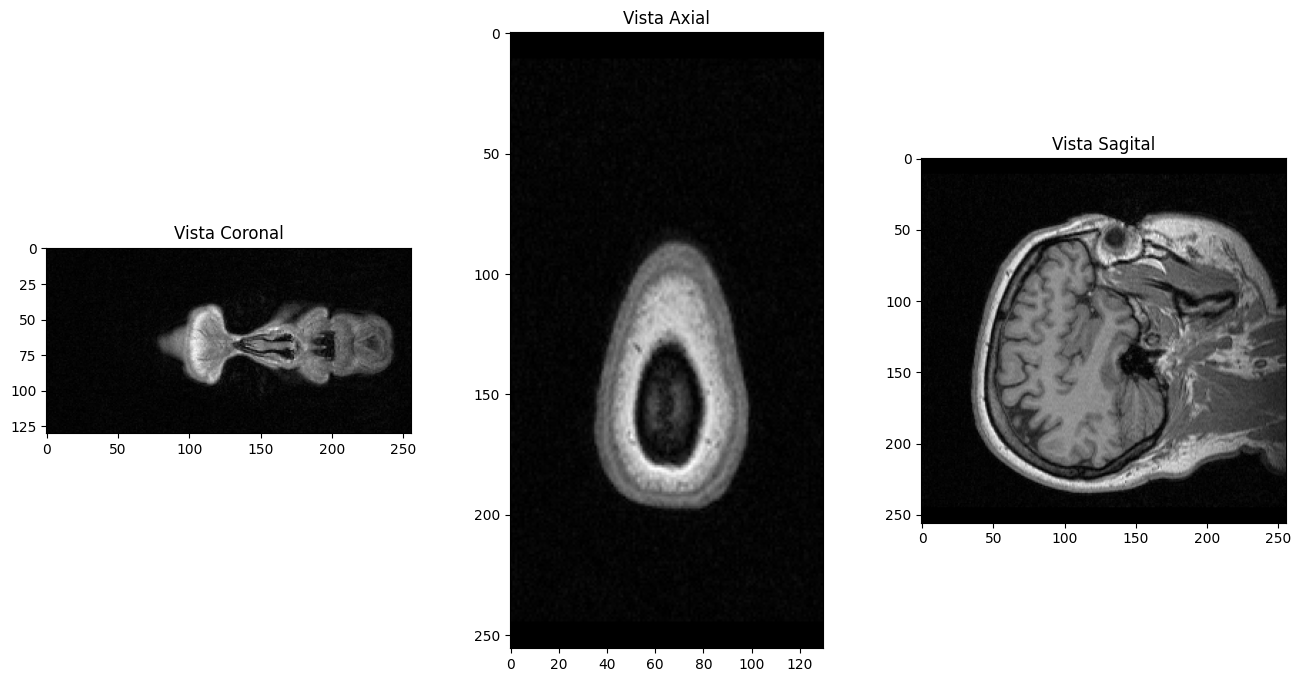

In [6]:
# @title Image view
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.title("Vista Coronal")
plt.imshow(coronal_view,cmap="gray")
plt.subplot(132)
plt.title("Vista Axial")
plt.imshow(axial_view,cmap="gray")
plt.subplot(133)
plt.title("Vista Sagital")
plt.imshow(sagital_view,cmap="gray")

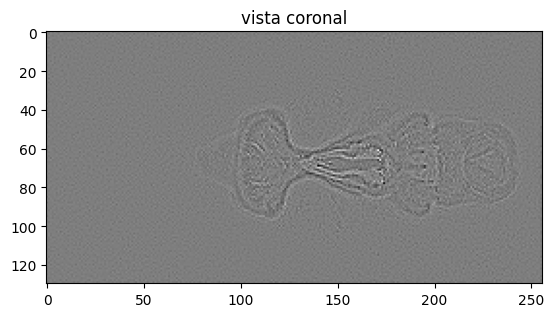

In [7]:
#kernel para detectar altas frecuencias o los bordes (dominio espacial)
kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
Imconv = signal.convolve2d(coronal_view,kernel, mode='same')
plt.title('vista coronal')
plt.imshow(Imconv, cmap='gray')

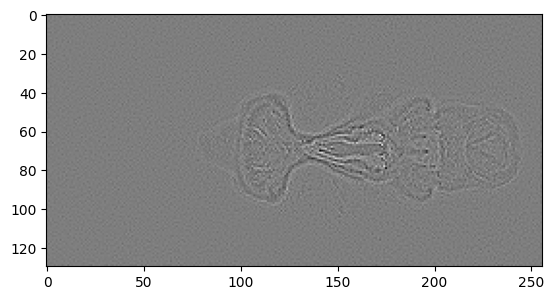

In [8]:
#(dominio en frecuencia)
IM = np.fft.fft2(coronal_view)
#creando la imagen del mismo tamaño pero negra
k = np.zeros(coronal_view.shape)
#igualando en una esquina el kernel
k[:3,:3] = kernel
K = np.fft.fft2(k) # Fourier Transform
prod = IM*K
imf = np.fft.ifft2(prod)
plt.imshow(imf.real, cmap='gray')

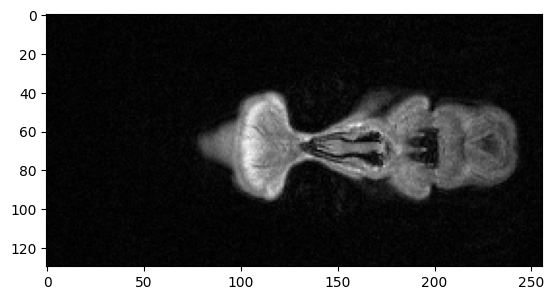

In [9]:
im = coronal_view
noise = np.random.normal(0, 40, im.shape)
imnoise = im+noise
kernel = np.ones([9,9])*1/(9*9)
kernel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
plt.imshow(im, cmap='gray')

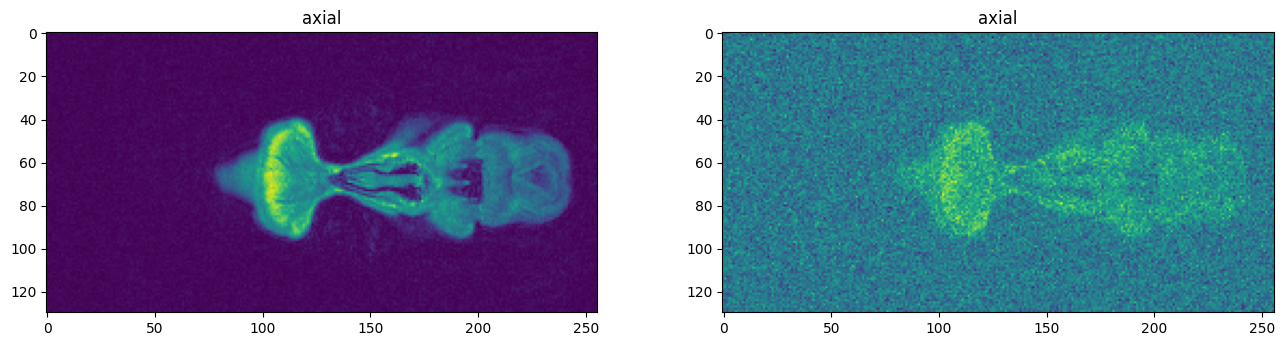

In [10]:
noise = np.random.normal(0, 40, im.shape)
imnoise = im+noise
plt.figure(figsize=(16,8))
plt.subplot(221)
plt.title('axial')
plt.imshow(im)
plt.subplot(222)
plt.title('axial')
plt.imshow(imnoise)

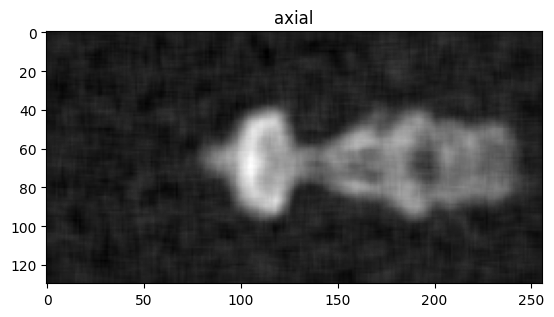

In [11]:
kernel = np.ones([9,9])*1/(9*9)
imconv = signal.convolve2d(imnoise, kernel, mode='same')
plt.title ('axial')
plt.imshow (imconv,cmap="gray")

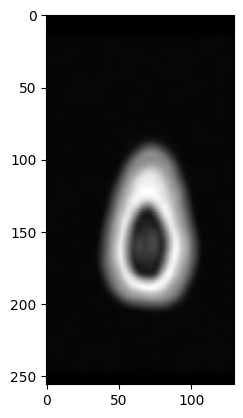

In [12]:
#(dominio en frecuencia)
IM = np.fft.fft2(axial_view)
#creando la imagen del mismo tamaño pero negra
k = np.zeros(axial_view.shape)
#igualando en una esquina el kernel
k[:9,:9] = kernel
K = np.fft.fft2(k) # Fourier Transform
prod = IM*K
imf = np.fft.ifft2(prod)
plt.imshow(imf.real, cmap='gray')


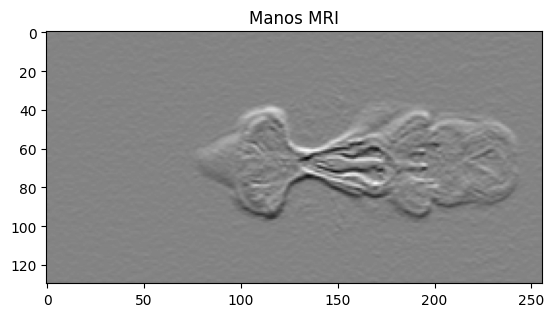

In [13]:
kernel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
imconv = signal.convolve2d(im, kernel, mode='same')
plt.title ("Axial")
plt.imshow (imconv,cmap="gray")

In [15]:
from scipy import ndimage

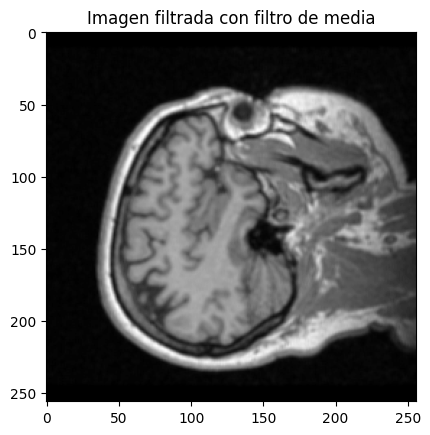

In [16]:
# Definir el tamaño del kernel (por ejemplo, 3x3)
kernel_size = 3

# Crear el kernel para el filtro de media
kernel = np.ones((kernel_size, kernel_size)) / (kernel_size**2)

# Aplicar el filtro de media a la imagen
filtered_image = ndimage.convolve(sagital_view, kernel)

# Visualizar la imagen filtrada
plt.imshow(filtered_image, cmap='gray')
plt.title('Imagen filtrada con filtro de media')
plt.show()

**Analisis de resultados**

---

```
1. Haciendo uso de la imagen “Sagital_view”, por favor consulte un filtro distinto a los
empleados en clase. Elabore una descripción del mismo, haciendo énfasis en sus
principales ventajas y desventajas. Posteriormente, procese la imagen empleando el
filtro descrito.
R/ El filtro de media es un filtro lineal que se aplica mediante una operación de convolución entre la imagen y un kernel cuadrado de tamaño NxN, donde todos los elementos del kernel tienen el mismo valor (1/N^2). La salida de la convolución en cada píxel es el promedio de los valores de los píxeles en la vecindad NxN centrada en ese píxel.

Ventajas:
*Reduce eficazmente el ruido gaussiano y el ruido impulsivo (sal y pimienta) en la imagen.
*Es un filtro sencillo de implementar y comprender.
*Preserva los bordes y detalles de la imagen mejor que otros filtros de suavizado como el filtro gaussiano.

Desventajas:

*Puede causar cierto desenfoque o suavizado excesivo en la imagen, especialmente en regiones con altos contrastes o bordes nítidos.
*No es muy efectivo para eliminar ruido de patrones periódicos o ruido correlacionado.
*Puede introducir artefactos cerca de los bordes de la imagen debido a los efectos de frontera.


```


**Conclusiones**

---
```
El procesamiento de imágenes médicas es una rama importante del procesamiento digital de señales, que busca facilitar la interpretación y diagnóstico de imágenes obtenidas con diferentes tecnologías médicas.Las imágenes médicas presentan limitaciones inherentes que requieren la aplicación de técnicas de procesamiento de imágenes para mejorar su calidad.

En Python existen bibliotecas especializadas que permiten leer, manipular y visualizar imágenes de forma sencilla, como PIL, OpenCV y Matplotlib.Las imágenes se pueden representar como arreglos 2D o 3D y sus valores de intensidad se pueden procesar con operaciones de álgebra matricial de NumPy y SciPy.

Operaciones básicas como la convolución espacial y la transformada de Fourier permiten implementar filtros que resaltan o atenúan ciertas características de las imágenes. Los notebooks de Jupyter permiten crear entornos interactivos para desarrollar y documentar proyectos de procesamiento de imágenes médicas con Python.

En sintesis en este laboratorio nos ayuda a aplicar conceptos básicos de procesamiento digital de imágenes sobre datos médicos reales.Los temas cubiertos sentarán las bases para desarrollar aplicaciones más avanzadas de procesamiento y análisis de imágenes médicas.
```

**Referencias**

---
```
-Gonzalez, R. C., & Woods, R. E. (2018). Digital image processing. Pearson.
-Hansen, C., & Johnson, C. R. (2005). The visualization handbook. Elsevier.
-Prince, J. L., & Links, J. M. (2006). Medical imaging signals and systems. Pearson Prentice Hall.
-Stonick, V. L., & Bradley, K. P. (1996). Labs for signals and systems using MATLAB. International Thompson Publishing.
```